In [53]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from matplotlib.ticker import LinearLocator

import pde

np.set_printoptions(precision=6) #truncate numerical values to improve their display

In [4]:
v = [-0.03, 0.05] #v-, v+
L = 0.8
k = 0.05
alpha = 0.03
tau = 1000
T = 600
s2 = np.sqrt(1./tau)
p = [0.94, 0.61]#p_c & p_ic
dt = 2
sigma = [-1, -1]

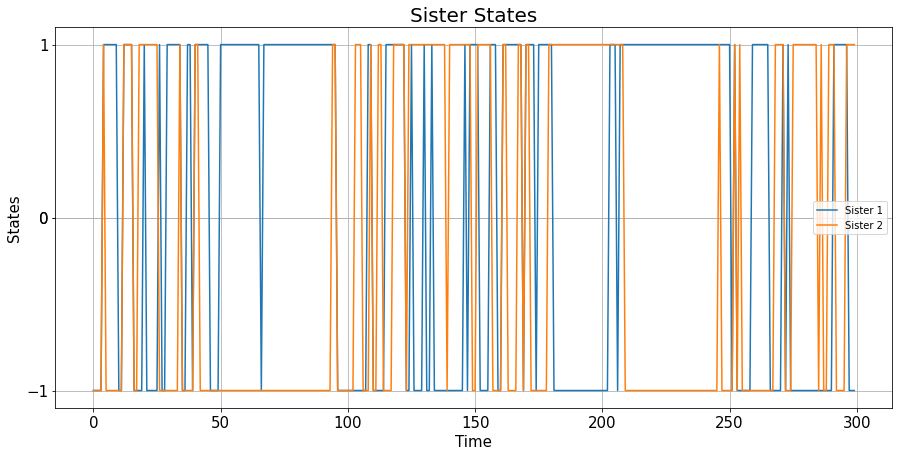

In [5]:
def a(X):
    """
    INPUT: 
        X : vector of sister positions
        
    OUTPUT:
        Y : spring + PEF component"""
    X1 = X[0]
    X2 = X[1]
    
    Y = np.zeros(2)
    Y[0] = -(k*(X1-X2-L*np.cos(0))) - (alpha*X1)
    Y[1] = -(k*(X2-X1+L*np.cos(0))) - (alpha*X2)
    
    return Y

def check_coherent(u):
    """
    INPUT:
        u : 1D vector of sister states
        
    OUTPUT:
        boolean to check if the sister states are coherent(opposite signs)"""
    if u == [1,-1] or u == [-1,1]:
        check = True
    else:
        check = False
    return check

def check_incoherent(u):
    """
    INPUT:
        u : 1D vector of sister states
        
    OUTPUT:
        boolean to check if the sister states are incoherent(same signs)"""
    if u == [1,1] or u == [-1,-1]:
        check = True
    else:
        check = False
    return check

def sister_states(p,T,dt):
    """
    INPUT:
        p : 1D vector of probabilities
        T : max time
        dt : time step
        
    OUTPUT:
        Y : 2D vector of the two sisters"""
    
    steps = np.arange(0,T,dt)
    Y = np.zeros((len(steps),2))
    Y[0] = sigma
    sign = -1
    
    
    for i in range(1,len(Y)):
        
        current_state = Y[i-1].tolist()
        sigma1 = current_state[0] #sister1
        sigma2 = current_state[1] #sister2
        
        #draw uniform random sample
        u = np.random.uniform(0,1,2)
        
        #check state
        if check_coherent(current_state):
            
            #compute new state using p_c
            if u[0] <= p[0] and u[1] <= p[0]: #remain coherent
                Y[i] = Y[i-1]
            elif u[0] <= p[0] and u[1] > p[0]: #sister 2 switches sign
                Y[i] = [sigma1, sigma2*sign]
            elif u[0] > p[0] and u[1] > p[0]: #both sisters switches sign
                Y[i] = [sigma1*sign, sigma2*sign]
            elif u[0] > p[0] and u[1] <= p[0]: #sister1 switches sign
                Y[i] = [sigma1*sign, sigma2]
        
        elif check_incoherent(current_state):
            
            #compute new state using p_ic
            if u[0] <= p[1] and u[1] <= p[1]: #remain coherent
                Y[i] = Y[i-1]
            elif u[0] <= p[1] and u[1] > p[1]: #sister 2 switches sign
                Y[i] = [sigma1, sigma2*sign]
            elif u[0] > p[1] and u[1] > p[1]: #both sisters switches sign
                Y[i] = [sigma1*sign, sigma2*sign]
            elif u[0] > p[1] and u[1] <= p[1]: #sister1 switches sign
                Y[i] = [sigma1*sign, sigma2]
    
    plt.figure(figsize=(15,7))
    plt.title('Sister States', fontsize=20)
    plt.xticks(fontsize=15);plt.yticks([-1,.0,0.0,1.0],fontsize=15)
    plt.xlabel('Time', fontsize=15);plt.ylabel('States',fontsize=15)
    plt.plot(Y[:,0],label='Sister 1')
    plt.plot(Y[:,1],label='Sister 2')
    plt.legend(fontsize=10)
    plt.grid('on')
    #plt.savefig('./Plots/ss.png')
    plt.show()
    return Y

Y = sister_states(p,T,dt)

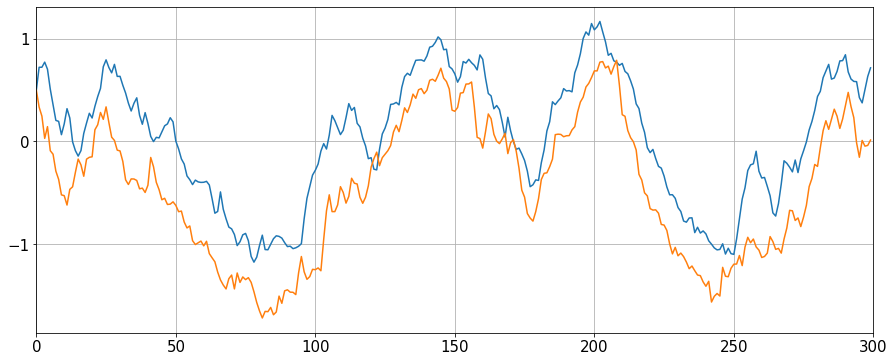

In [6]:
Z = np.zeros((len(Y),2))
Z[0] = [0.5,0.5]

for i in range(1,len(Y)):
    
    X = a(Z[i-1])
    
    if Y[i,0] == -1 and Y[i,1] == 1:
        Z[i,0] = Z[i-1,0] + (-v[0] + X[0] + np.random.normal(0,(s2)))*dt
        Z[i,1] = Z[i-1,1] + (v[1] + X[1] + np.random.normal(0,(s2)))*dt
        
    elif Y[i,0] == -1 and Y[i,1] == -1:
        Z[i,0] = Z[i-1,0] + (-v[0] + X[0] + np.random.normal(0,(s2)))*dt
        Z[i,1] = Z[i-1,1] + (v[0] + X[1] + np.random.normal(0,(s2)))*dt
    
    elif Y[i,0] == 1 and Y[i,1] == -1:
        Z[i,0] = Z[i-1,0] + (-v[1] + X[0] + np.random.normal(0,(s2)))*dt
        Z[i,1] = Z[i-1,1] + (v[0] + X[1] + np.random.normal(0,(s2)))*dt
    
    elif Y[i,0] == 1 and Y[i,1] == 1:
        Z[i,0] = Z[i-1,0] + (-v[1] + X[0] + np.random.normal(0,(s2)))*dt
        Z[i,1] = Z[i-1,1] + (v[1] + X[1] + np.random.normal(0,(s2)))*dt
Z
plt.figure(figsize=(15,6))
plt.grid('on')
plt.xticks(fontsize='15');plt.yticks(fontsize='15',ticks=[-1.0,0.0,1.0])
plt.xlim(0,300)
plt.plot(Z[:,0])
plt.plot(Z[:,1])
# plt.savefig('./Plots/new_oscillations.png')
plt.show()

In [6]:
np.save('./data/disp.npy',Z)

In [8]:
disp = []

def disp_sim(Y):
    Z = np.zeros((len(Y),2))
    Z[0] = [0.5,0.5]

    for i in range(1,len(Y)):

        X = a(Z[i-1])

        if Y[i,0] == -1 and Y[i,1] == 1:
            Z[i,0] = Z[i-1,0] + (-v[0] + X[0] + np.random.normal(0,(s2)))*dt
            Z[i,1] = Z[i-1,1] + (v[1] + X[1] + np.random.normal(0,(s2)))*dt

        elif Y[i,0] == -1 and Y[i,1] == -1:
            Z[i,0] = Z[i-1,0] + (-v[0] + X[0] + np.random.normal(0,(s2)))*dt
            Z[i,1] = Z[i-1,1] + (v[0] + X[1] + np.random.normal(0,(s2)))*dt

        elif Y[i,0] == 1 and Y[i,1] == -1:
            Z[i,0] = Z[i-1,0] + (-v[1] + X[0] + np.random.normal(0,(s2)))*dt
            Z[i,1] = Z[i-1,1] + (v[0] + X[1] + np.random.normal(0,(s2)))*dt

        elif Y[i,0] == 1 and Y[i,1] == 1:
            Z[i,0] = Z[i-1,0] + (-v[1] + X[0] + np.random.normal(0,(s2)))*dt
            Z[i,1] = Z[i-1,1] + (v[1] + X[1] + np.random.normal(0,(s2)))*dt
    
    return Z


for i in range(1000):
    disp.append(disp_sim(Y))

In [10]:
disp=np.array(disp)
disp.shape

(1000, 300, 2)

In [22]:
time_snap = [50,100,150,299]

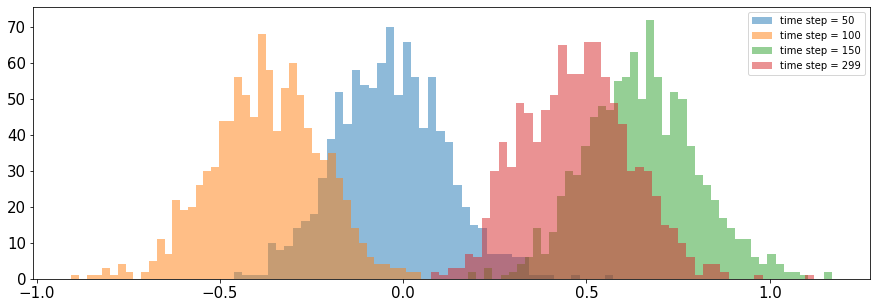

In [23]:
data = []
plt.figure(figsize=(15,5))
for val in time_snap:
    plt.hist(disp[:,val,0],bins=45,label='time step = {}'.format(val),alpha=0.5)
    data.append(disp[:,val,:])

plt.xticks(fontsize=15);plt.yticks(fontsize=15)
plt.legend();

In [38]:
X = disp[:,:,0]
Y = disp[:,:,1]

time = np.arange(0,len(Y))
time.shape

(1000,)

In [47]:
Z = np.subtract(X,Y)
Z.shape

(1000, 300)

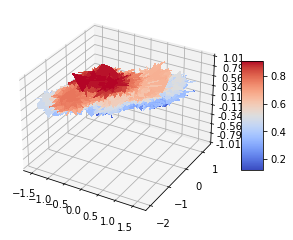

In [54]:
# plt.figure(figsize=(15,10))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

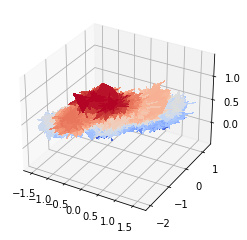

In [50]:
fig

# Fokker-Plancks Equation

In [5]:
def gamma(X):
    
    gamma = np.zeros(2)
    gamma[0] = -v[0] - (k*(X[0]-X[1]-(L*np.cos(0))-(alpha*X[0])))
    gamma[1] = v[1] - (k*(X[1]-X[0]+(L*np.cos(0))-(alpha*X[1])))
    
    return gamma

In [55]:
s = np.sqrt(1./1000.)
# drift = "0.02+0.13*x"
# diffus = "0.5*0.001"

# term1 = "0.13*p"
# term2 = f"({drift}) * gradient(p)"
# term3 = "0.0005 * laplace(p)"
eq = pde.PDE({"p": "d_dx(p * (a+(b*x))) + (0.05 * laplace(p))"},
             consts={'a':0.02,
                     'b':0.13},
             bc={"value": 0})


# eq = pde.PDE({"φ": "6 * φ * d_dx(φ) - laplace(d_dx(φ))"})

              
grid = pde.CartesianGrid([[1, 5]], 64)  # generate grid
field = pde.ScalarField(grid, 0.25)  # generate initial condition

storage = pde.MemoryStorage()  # store intermediate information of the simulation
trackers = [
    "progress",  # show progress bar during simulation
    "steady_state",  # abort when steady state is reached
    storage.tracker(interval=1),  # store data every simulation time unit
    pde.PlotTracker(show=True),  # show images during simulation
    # print some output every 5 real seconds:
    pde.PrintTracker(interval=pde.RealtimeIntervals(duration=2)),
]
res = eq.solve(field, 15, dt=0.01, tracker=trackers)  # solve the PDE

pde.plot_kymograph(storage,filename='../Plots/time_evol_p++.png',
                        title='Heat map for time evolution of p++')  # visualize the result in a space-time plot

IndentationError: unexpected indent (1821400360.py, line 10)

In [40]:
np.array(storage.data).shape

(16, 64)